In [12]:
import torch 
import diffusers
from diffusers import StableDiffusionPipeline, DDIMScheduler

In [7]:
# check info of library 
print("Diffusers version: ", diffusers.__version__)
print("torch version: ", torch.__version__)

Diffusers version:  0.26.3
torch version:  2.0.1+cu118


In [15]:
# load pipeline 
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",  torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
generator = torch.Generator("cuda").manual_seed(42)
prompt = "a photograph of an astronaut riding a horse"
image = pipe(prompt, guidance_scale=7.5, generator=generator)
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FE4BF98C6D0>], nsfw_content_detected=[False])

  0%|          | 0/50 [00:00<?, ?it/s]

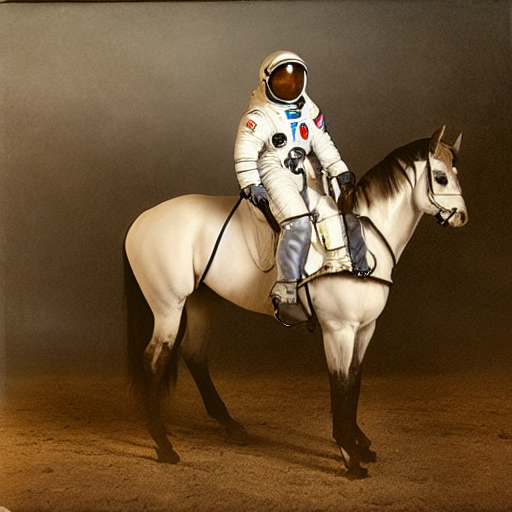

In [17]:
generator = torch.Generator("cuda").manual_seed(42)
prompt = "a photograph of an astronaut riding a horse"
image = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]
display(image)

In [ ]:
 image = Image.open(INPUT_IMAGE)
    image = torchvision.transforms.ToTensor()(image).unsqueeze(0)
    # resize image to 512x512
    image = torchvision.transforms.Resize((512, 512))(image)
    # rescale image to [-1,1] from [0,1]
    image = image * 2 - 1

    pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=MASTER_TYPE,safety_checker=None).to(DEVICE)
    pipe._callback_tensor_inputs = ["latents", "prompt_embeds", "latent_model_input", "timestep_cond", "added_cond_kwargs", "extra_step_kwargs", "noise_pred", "timesteps"]
